In [13]:
# from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets

In [14]:
import torch
import numpy as np
import pandas as pd
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [16]:
train_transforms = transforms.Compose([
                                        transforms.RandomCrop(32,padding=4),
                                        transforms.RandomHorizontalFlip(),    
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                        transforms.RandomErasing()
                                      ])

test_transforms = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])


train = datasets.CIFAR10(root='data', train=True,
                                   download=True, transform=train_transforms)

test = datasets.CIFAR10(root='data', train=False,
                                  download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, num_workers=0)
test_loader = torch.utils.data.DataLoader(test, batch_size=100, num_workers=0)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# for training, validation
len(train_loader.sampler), len(test_loader.sampler)

(50000, 10000)

In [18]:
iter1 = iter(train_loader)
iter2 = iter(test_loader)

In [19]:
img1, lbl1 = next(iter1)

In [20]:
img1.shape, img1.dtype

(torch.Size([64, 3, 32, 32]), torch.float32)

In [21]:
lbl1.shape, img1.dtype

(torch.Size([64]), torch.float32)

In [22]:
img1[0][0].min(), img1[0][0].mean(), img1[0][0].max(), img1[0][0].std() 

(tensor(-1.), tensor(0.0105), tensor(1.), tensor(0.4407))

<AxesSubplot:ylabel='Count'>

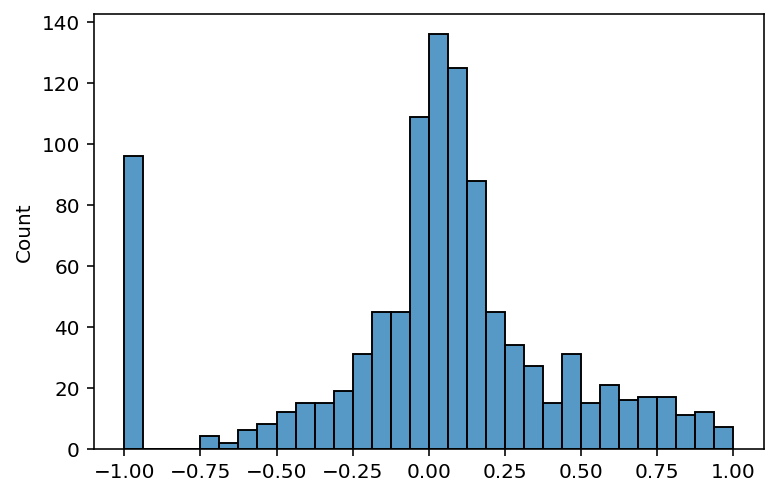

In [23]:
sns.histplot(img1[0][0].flatten())

In [24]:
img2, lbl2 = next(iter2)

In [25]:
img2.shape, img2.dtype

(torch.Size([100, 3, 32, 32]), torch.float32)

In [26]:
lbl2.shape, img2.dtype

(torch.Size([100]), torch.float32)

In [27]:
img2[0][0].min(), img2[0][0].mean(), img2[0][0].max(), img2[0][0].std() 

(tensor(-0.8980), tensor(-0.1371), tensor(1.), tensor(0.4124))

<AxesSubplot:ylabel='Count'>

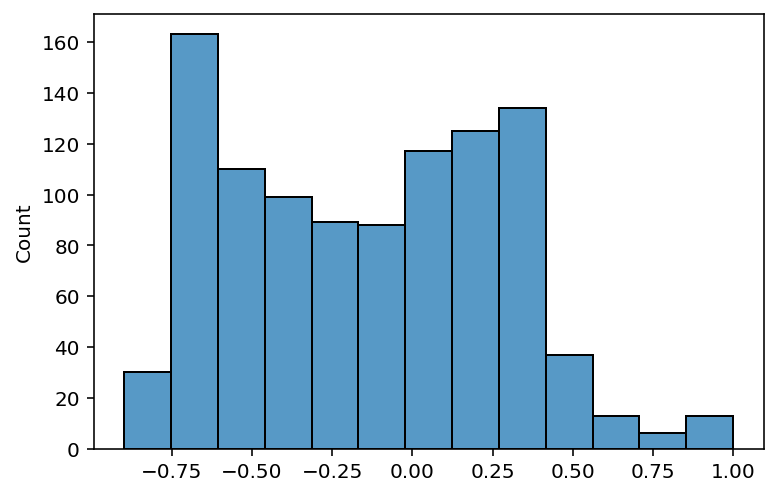

In [28]:
sns.histplot(img2[0][0].flatten())

In [29]:
mean_mean_of_batch = []
mean_std_of_batch = []
for i in range(img1.shape[0]):
    mean_mean_of_batch.append(img1[i][0].mean())
    mean_std_of_batch.append(img1[i][0].std())
    if i < 5:
        print(img1[i][0].min(), img1[i][0].mean(), img1[i][0].max(), img1[i][0].std())
print("============================")
print(f"mean_mean_of_batch: {np.array(mean_mean_of_batch).mean()}, mean_std_of_batch: {np.array(mean_std_of_batch).mean()}")

tensor(-1.) tensor(0.0105) tensor(1.) tensor(0.4407)
tensor(-1.) tensor(-0.1249) tensor(0.9922) tensor(0.5877)
tensor(-1.) tensor(-0.0728) tensor(1.) tensor(0.6001)
tensor(-1.) tensor(-0.2641) tensor(0.7804) tensor(0.3440)
tensor(-1.) tensor(-0.4380) tensor(0.9922) tensor(0.4778)
mean_mean_of_batch: -0.16387704014778137, mean_std_of_batch: 0.47935158014297485


In [30]:
mean_mean_of_batch = []
mean_std_of_batch = []
for i in range(img2.shape[0]):
    mean_mean_of_batch.append(img2[i][0].mean())
    mean_std_of_batch.append(img2[i][0].std())
    if i < 5:
        print(img2[i][0].min(), img2[i][0].mean(), img2[i][0].max(), img2[i][0].std())
print("============================")
print(f"mean_mean_of_batch: {np.array(mean_mean_of_batch).mean()}, mean_std_of_batch: {np.array(mean_std_of_batch).mean()}")

tensor(-0.8980) tensor(-0.1371) tensor(1.) tensor(0.4124)
tensor(-1.) tensor(0.1814) tensor(0.8824) tensor(0.6116)
tensor(-0.9686) tensor(-0.0508) tensor(0.9608) tensor(0.5319)
tensor(-0.7098) tensor(0.1928) tensor(0.6863) tensor(0.4163)
tensor(-0.9451) tensor(-0.1540) tensor(0.6392) tensor(0.3534)
mean_mean_of_batch: -0.029123980551958084, mean_std_of_batch: 0.4063073992729187


In [31]:
train_loader.dataset.data[0].shape

(32, 32, 3)

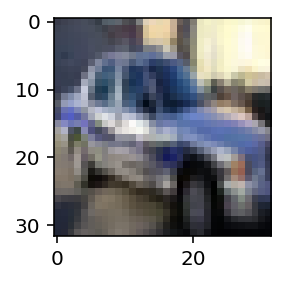

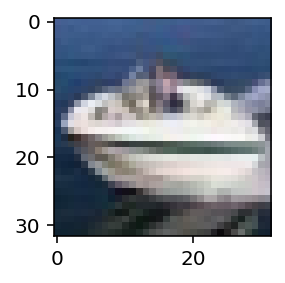

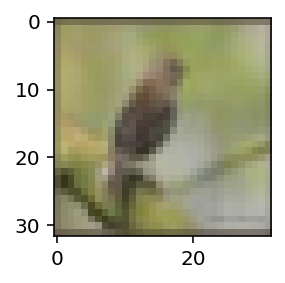

In [32]:
# show 3 random images of data set
for i in [311,222,533]:
    plt.figure(figsize=(2, 2))
    plt.imshow(train_loader.dataset.data[i], interpolation='nearest')
    plt.show()

In [33]:
# # these 3 images after [0] convolving kernel of first convolutional layer
# for i in [311,222,533]:
#     plt.figure(figsize=(2, 2))
#     plt.imshow(model.conv1(torch.tensor(train_loader.dataset.data[i], dtype=torch.float32).permute(2,1,0).cuda())[0].cpu().detach().numpy(), interpolation='nearest')
#     plt.show()

In [34]:
# # these 3 images after max-pooling of [0] convolving kernel of first convolutional layer
# for i in [311,222,533]:
#     plt.figure(figsize=(2, 2))
#     plt.imshow(model.pool(F.relu(model.conv1(torch.tensor(train_loader.dataset.data[i], dtype=torch.float32).permute(2,1,0).cuda())))[0].cpu().detach().numpy(), interpolation='nearest')
#     plt.show()

In [35]:
import torch.nn as nn
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, 2, padding=1)
        self.norm1 = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, 2, padding=1)
        self.norm2 = nn.BatchNorm2d(128)
        
        self.conv3 = nn.Conv2d(128, 256, 2, padding=1)
        self.norm3 = nn.BatchNorm2d(256)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        
        x = self.norm1(self.pool(F.relu(self.conv1(x))))
        
        x = self.dropout(x)
        
        x = self.norm2(self.pool(F.relu(self.conv2(x))))
        
        x = self.dropout(x)
        
        x = self.norm3(self.pool(F.relu(self.conv3(x))))
        

        x = self.dropout(x)

        # flatten image input
        x = x.view(-1, 256 * 4 * 4)

        x = F.relu(self.fc1(x))

        x = self.dropout(x)

        x = F.relu(self.fc2(x))

        x = self.dropout(x)
        
        x = F.relu(self.fc3(x))

        x = self.dropout(x)

        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# create a complete CNN
model = Net().cuda()
print(model)


Net(
  (conv1): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [36]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [37]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for training

with torch.no_grad():
    for data, target in test_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data.cuda())
        # calculate the loss
        loss = criterion(output, target.cuda())
        # update test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.cuda().data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(100):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.sampler)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest (Overall): %0d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.302990

Test Accuracy of     0:  0% ( 0/1000)
Test Accuracy of     1:  0% ( 0/1000)
Test Accuracy of     2:  0% ( 0/1000)
Test Accuracy of     3:  0% ( 0/1000)
Test Accuracy of     4:  0% ( 0/1000)
Test Accuracy of     5:  0% ( 0/1000)
Test Accuracy of     6:  0% ( 0/1000)
Test Accuracy of     7: 100% (1000/1000)
Test Accuracy of     8:  0% ( 0/1000)
Test Accuracy of     9:  0% ( 0/1000)

Test (Overall): 10% (1000/10000)


In [27]:
epochs = 150
accuracy_min = 0

for e in range(epochs):
    print(f"Epoch number {e+1}")
    train_loss = 0
    test_loss = 0.0
    
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    # TRAINING
    model.train()
    for data, target in train_loader:
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        loss = criterion(model(data), target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # VALIDATION
    model.eval()   
    with torch.no_grad():
        overall_correct = 0
        for data, target in test_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.cuda())
            # calculate the loss
            loss = criterion(output, target.cuda())
            # update test loss 
            test_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)
            # compare predictions to true label
            correct = np.squeeze(pred.eq(target.cuda().data.view_as(pred)))
            correct = correct.to(torch.int64)
            overall_correct += correct.sum()
            
        accuracy = overall_correct/10000
        print(f"train_loss: {train_loss}, test_loss: {test_loss}, accuracy test_set: {accuracy.item()}")
        if accuracy >= accuracy_min:
            print('Accuracy metrics increased ({:.6f} --> {:.6f}).  Saving model ...'.format(accuracy_min,accuracy))
            torch.save(model.state_dict(), '/kaggle/working/CIFAR10-CNN.pt')
            accuracy_min = accuracy
        print("=========================================")
    

Epoch number 1
train_loss: 1657.5007339715958, test_loss: 20285.92119216919, accuracy test_set: 0.2304999977350235
Accuracy metrics increased (0.000000 --> 0.230500).  Saving model ...
Epoch number 2
train_loss: 1369.691472530365, test_loss: 18252.883684635162, accuracy test_set: 0.34790000319480896
Accuracy metrics increased (0.230500 --> 0.347900).  Saving model ...
Epoch number 3
train_loss: 1230.771832227707, test_loss: 18930.418121814728, accuracy test_set: 0.3538999855518341
Accuracy metrics increased (0.347900 --> 0.353900).  Saving model ...
Epoch number 4
train_loss: 1145.8935022354126, test_loss: 18390.130269527435, accuracy test_set: 0.38760000467300415
Accuracy metrics increased (0.353900 --> 0.387600).  Saving model ...
Epoch number 5
train_loss: 1083.5667017698288, test_loss: 19176.72656774521, accuracy test_set: 0.38119998574256897
Epoch number 6
train_loss: 1037.2837511897087, test_loss: 15555.479717254639, accuracy test_set: 0.4668999910354614
Accuracy metrics increase

In [28]:
epochs = 150
accuracy_min = 0.8561

for e in range(epochs):
    print(f"Epoch number {e+1}")
    train_loss = 0
    test_loss = 0.0
    
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    # TRAINING
    model.train()
    for data, target in train_loader:
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        loss = criterion(model(data), target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # VALIDATION
    model.eval()   
    with torch.no_grad():
        overall_correct = 0
        for data, target in test_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.cuda())
            # calculate the loss
            loss = criterion(output, target.cuda())
            # update test loss 
            test_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)
            # compare predictions to true label
            correct = np.squeeze(pred.eq(target.cuda().data.view_as(pred)))
            correct = correct.to(torch.int64)
            overall_correct += correct.sum()
            
        accuracy = overall_correct/10000
        print(f"train_loss: {train_loss}, test_loss: {test_loss}, accuracy test_set: {accuracy.item()}")
        if accuracy >= accuracy_min:
            print('Accuracy metrics increased ({:.6f} --> {:.6f}).  Saving model ...'.format(accuracy_min,accuracy))
            torch.save(model.state_dict(), '/kaggle/working/CIFAR10-CNN.pt')
            accuracy_min = accuracy
        print("=========================================")
    

Epoch number 1
train_loss: 363.5199183821678, test_loss: 4530.538737773895, accuracy test_set: 0.854699969291687
Epoch number 2
train_loss: 364.96689051389694, test_loss: 4492.465987801552, accuracy test_set: 0.8572999835014343
Accuracy metrics increased (0.856100 --> 0.857300).  Saving model ...
Epoch number 3
train_loss: 361.87441892921925, test_loss: 4531.83081895113, accuracy test_set: 0.8565999865531921
Epoch number 4
train_loss: 357.7434680759907, test_loss: 4543.841344118118, accuracy test_set: 0.85589998960495
Epoch number 5
train_loss: 361.72346618771553, test_loss: 4607.761435210705, accuracy test_set: 0.8529999852180481
Epoch number 6
train_loss: 357.6313554495573, test_loss: 4579.813130199909, accuracy test_set: 0.854200005531311
Epoch number 7
train_loss: 354.6066284030676, test_loss: 4619.783084094524, accuracy test_set: 0.8540999889373779
Epoch number 8
train_loss: 355.22929134964943, test_loss: 4569.804152846336, accuracy test_set: 0.8543999791145325
Epoch number 9
trai

In [38]:
model.load_state_dict(torch.load('../input/modelik/CIFAR10-CNN_final_0.pt'))

<All keys matched successfully>

In [39]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for training

with torch.no_grad():
    for data, target in test_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data.cuda())
        # calculate the loss
        loss = criterion(output, target.cuda())
        # update test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.cuda().data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(100):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.sampler)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest (Overall): %0d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.430658

Test Accuracy of     0: 83% (836/1000)
Test Accuracy of     1: 91% (916/1000)
Test Accuracy of     2: 82% (826/1000)
Test Accuracy of     3: 72% (722/1000)
Test Accuracy of     4: 91% (916/1000)
Test Accuracy of     5: 78% (787/1000)
Test Accuracy of     6: 95% (952/1000)
Test Accuracy of     7: 88% (880/1000)
Test Accuracy of     8: 96% (960/1000)
Test Accuracy of     9: 91% (913/1000)

Test (Overall): 87% (8708/10000)
